In [17]:
import healpy as hp
import numpy as np
from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
import tensorflow as tf
import h5py
from astropy.io import fits
from began.visualization import mplot
plt.style.use(astropy_mpl_style)

In [3]:
mhd = hp.read_map("../data/raw/allsky_maps/MHD_4pc_new.0425.Nside128-x0y0z0.fits", field=(0, 1, 2))

NSIDE = 128
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/home/bthorne/projects/gan/began/envs/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


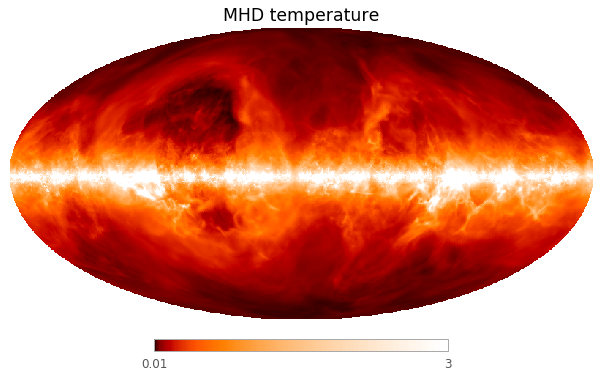

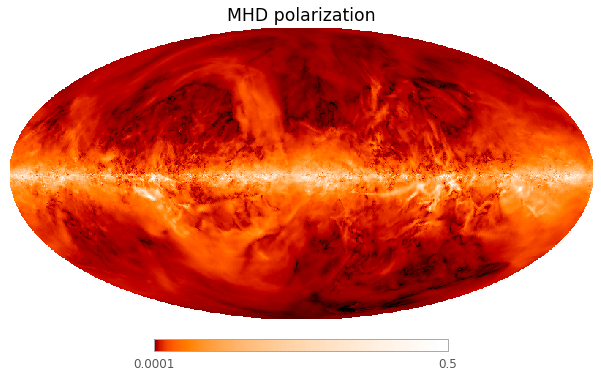

In [4]:
hp.mollview(mhd[0], norm='log', title='MHD temperature', min=0.01, max=3)
fig = plt.gcf()
fig.savefig("../reports/figures/mhd_t.png", dpi=300)
hp.mollview(np.sqrt(mhd[1] ** 2 + mhd[2] ** 2), norm='log', title='MHD polarization', min=0.0001, max=0.5)
fig = plt.gcf()
fig.savefig("../reports/figures/mhd_p.png", dpi=300)

In [8]:
hdu = fits.open("../data/raw/allsky_maps/MHD_4pc_new.0425.Nside128-x0y0z0.fits")

In [9]:
hdu[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                12288 / length of dimension 1                          
NAXIS2  =                  192 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    3 / number of table fields                         
TTYPE1  = 'I_STOKES'                                                            
TFORM1  = '1024E   '                                                            
TTYPE2  = 'Q_STOKES'                                                            
TFORM2  = '1024E   '                                                            
TTYPE3  = 'U_STOKES'        

In [10]:
with h5py.File('../data/preprocessed/prepared.h5', 'r') as f:
    cut_maps = f['cut_maps'][...]
    
cut_maps.shape

(1754, 256, 256, 1)

In [26]:
dset = tf.data.Dataset.from_tensor_slices(cut_maps).shuffle(cut_maps.shape[0], reshuffle_each_iteration=True).batch(16)
standardized = dset.map(tf.image.per_image_standardization)

0.9999999981825447


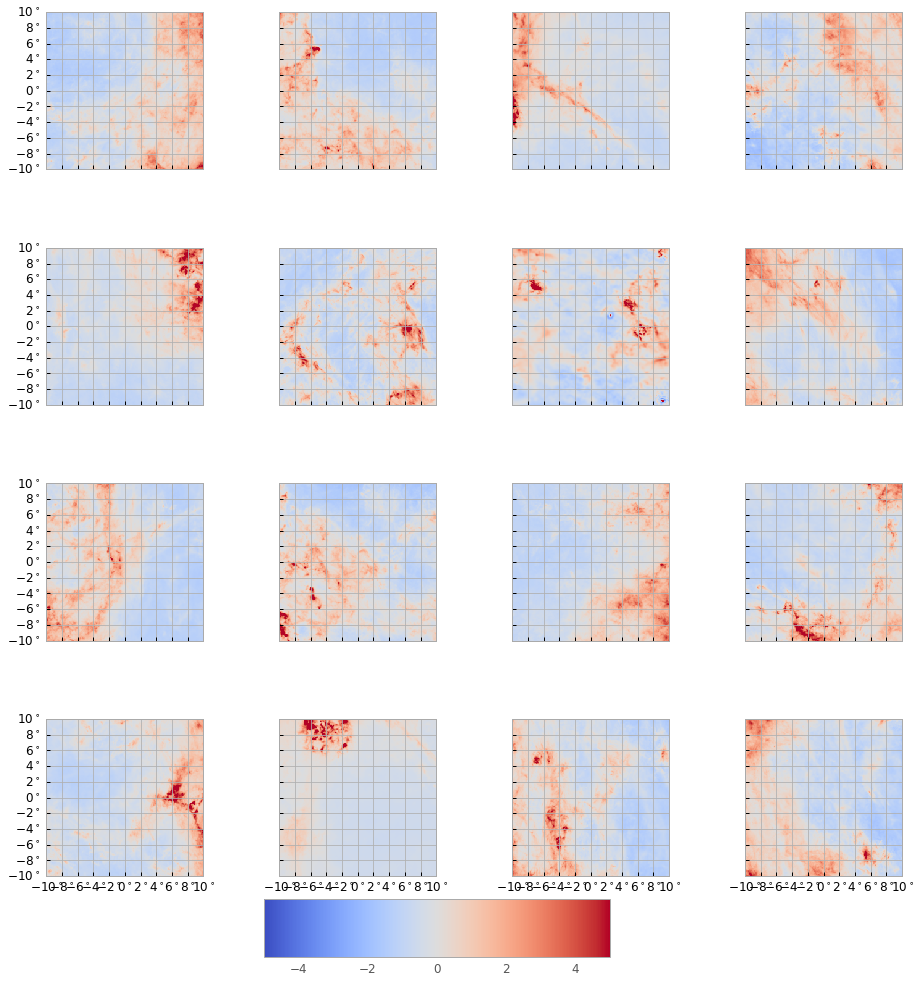

In [29]:
for d in standardized:
    print(np.std(d))
    mplot(d[..., 0], cbar_range=[-5, 5], extent=(-10, 10, -10, 10))
    break